<a href="https://colab.research.google.com/github/MadisonCostanza/Oklahoma-State-Credit-Card-Expenditure-Analysis/blob/main/Copy_of_Oklahoma_Credit_Card_Spend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To begin the analysis, we should import the relevant libraries and the dataset as a new DataFrame named "spending data"

In [1]:
import pandas as pd
import numpy as np

In [2]:
spending_data = pd.read_csv('Oklahoma Gov Spending 2014.csv')

We see that the data contains 10 columns and 442,458 rows.  This indicates that Oklahoma State Government made 442,458 purchases in Fiscal Year 2014.

In [3]:
spending_data.shape

(442458, 12)

In [4]:
spending_data.sample(10)

,index,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
226628,226628,201311,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,JOURNEY HOUSE TRAVEL,G,AIR TRAVEL,392.10,AMERICAN AI 0017317801398,11/08/2013 12:00:00 AM,11/11/2013 12:00:00 AM,AMERICAN AIRLINES
328958,328958,201402,76000,UNIVERSITY OF OKLAHOMA,NOAD,K,287254132203 ITM,81.19,AT&T BILL PAYMENT,02/25/2014 12:00:00 AM,02/27/2014 12:00:00 AM,TELECOMMUNICATION SERVICES
331521,331521,201402,76000,UNIVERSITY OF OKLAHOMA,DOUGLESS,A,Tulsa's Historic Greenwood PCE,30.62,Amazon.com,02/16/2014 12:00:00 AM,02/17/2014 12:00:00 AM,BOOK STORES
215904,215904,201309,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,HINSON,S,GENERAL PURCHASE,600.00,UCD MC CONT MED EDUC,09/24/2013 12:00:00 AM,09/25/2013 12:00:00 AM,MEDICAL SERVICES & HEALTH PRACTITIONERS NOT EL...
292883,292883,201403,13100,DEPARTMENT OF CORRECTIONS,Gulley,J,GENERAL PURCHASE,82.04,WM SUPERCENTER #50,03/21/2014 12:00:00 AM,03/24/2014 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
243656,243656,201310,80500,DEPARTMENT OF REHABILITATION SERVICES,KING,R,GENERAL PURCHASE,1709.10,TPC GOPHER,10/01/2013 12:00:00 AM,10/01/2013 12:00:00 AM,SPORTING GOODS STORES
274001,274001,201403,1000,OKLAHOMA STATE UNIVERSITY,Fitzpatrick,S,GENERAL PURCHASE,151.94,MOBILE MINI,03/14/2014 12:00:00 AM,03/17/2014 12:00:00 AM,"MOTOR FREIGHT CARRIERS,AND TRUCKING"
179358,179358,201309,76000,UNIVERSITY OF OKLAHOMA,BENTLEY HEDGES TRAVEL,G,AIR TRAVEL,455.60,AMERICAN AI 0017304146447,09/16/2013 12:00:00 AM,09/18/2013 12:00:00 AM,AMERICAN AIRLINES
389840,389840,201406,4000,"DEPARTMENT OF AGRICULTURE, FOOD, ANF FOR",Madden,R,GENERAL PURCHASE,-10.39,FLOYDS CAMPERS INC,06/23/2014 12:00:00 AM,06/25/2014 12:00:00 AM,"CAMPER,RECREATIONAL AND UTILITY TRAILER DEALERS"
312948,312948,201402,56600,DEPARTMENT OF TOURISM AND RECREATION,Willeby,M,GENERAL PURCHASE,5140.76,DEPT OF CORRECTIONS,02/18/2014 12:00:00 AM,02/20/2014 12:00:00 AM,GOVERNMENT SERVICES--NOT ELSEWHERE CLASSIFIED


# EDA and Data Cleansing

In [5]:
spending_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442458 entries, 0 to 442457
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   index                         442458 non-null  int64  
 1   Year-Month                    442458 non-null  int64  
 2   Agency Number                 442458 non-null  int64  
 3   Agency Name                   442458 non-null  object 
 4   Cardholder Last Name          442458 non-null  object 
 5   Cardholder First Initial      442458 non-null  object 
 6   Description                   442458 non-null  object 
 7   Amount                        442458 non-null  float64
 8   Vendor                        442458 non-null  object 
 9   Transaction Date              442458 non-null  object 
 10  Posted Date                   442458 non-null  object 
 11  Merchant Category Code (MCC)  442458 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory us

Change columns to be lower-case and remove spaces:

In [6]:
spending_data.columns = spending_data.columns.str.lower().str.replace(" ","_")

We should change the Transaction Date to a DateTime data type:

In [7]:
spending_data['transaction_date'] = pd.to_datetime(spending_data['transaction_date'])

In [8]:
spending_data['posted_date'] = pd.to_datetime(spending_data['posted_date'])

According to Oklahoma State website OKPolicy.org, Oklahoma's fiscal year begins on 7/1 and ends on 6/30.

https://okpolicy.org/fiscal-year/

To properly analyze the data in this fiscal year, we should identify whether transactions are counted towards the fiscal year by "Transaction Date" or "Posted Date."  To do this, we should check the min and max of both variables in the dataset:

In [9]:
spending_data.transaction_date.min()


Timestamp('2013-04-17 00:00:00')

In [10]:
spending_data.transaction_date.max()

Timestamp('2014-06-30 00:00:00')

In [11]:
spending_data.posted_date.min()

Timestamp('2013-07-01 00:00:00')

In [12]:
spending_data.posted_date.max()

Timestamp('2014-06-30 00:00:00')

*We will continue by using the "Posted Date" for the majority our analysis because it aligns with Oklahoma's fiscal calendar dates*

We can also remove "Index" and "Year-Month" columns, as they will not be neccessary for our analysis:

In [13]:
column_list = ['index','year-month']
spending_data = spending_data.drop(columns=column_list)

Check that the change worked by displaying all columns:

In [14]:
spending_data.columns

Index(['agency_number', 'agency_name', 'cardholder_last_name',
       'cardholder_first_initial', 'description', 'amount', 'vendor',
       'transaction_date', 'posted_date', 'merchant_category_code_(mcc)'],
      dtype='object')

Check for missing data entries:

In [15]:
spending_data.isna().sum()

agency_number                   0
agency_name                     0
cardholder_last_name            0
cardholder_first_initial        0
description                     0
amount                          0
vendor                          0
transaction_date                0
posted_date                     0
merchant_category_code_(mcc)    0
dtype: int64

We can look at the top 10 agencies that are making the largest number of purchases:

In [16]:
spending_data.agency_name.value_counts().head()

OKLAHOMA STATE UNIVERSITY                115995
UNIVERSITY OF OKLAHOMA                    76143
UNIV. OF OKLA. HEALTH SCIENCES CENTER     58247
DEPARTMENT OF CORRECTIONS                 22322
DEPARTMENT OF TOURISM AND RECREATION      17232
Name: agency_name, dtype: int64

We can take a look at the top 10 purchase descriptions:

In [17]:
spending_data.description.value_counts().head(10)

GENERAL PURCHASE                 247187
AIR TRAVEL                        29584
ROOM CHARGES                      18120
AT&T SERVICE PAYMENT ITM           2657
001 Priority          1LB PCE      2005
000000000000000000000000           1828
PRODUCTS AND SERVICES EA           1264
SHIPPING CHARGES                   1210
001 Standard          1LB PCE       738
JANITORIAL SUPPLIES NMB             641
Name: description, dtype: int64

And we can see the top 10 vendors where purchases are most frequent:

In [18]:
spending_data.vendor.value_counts().head(10)

STAPLES                      14842
AMAZON MKTPLACE PMTS         12197
WW GRAINGER                  12076
Amazon.com                   10766
BILL WARREN OFFICE PRODUC     4479
LOWES #00241                  4231
VWR INTERNATIONAL INC         3912
AT&T BILL PAYMENT             3064
AIRGAS CENTRAL                2682
AT&T DATA                     2622
Name: vendor, dtype: int64

*This is somewhat helpful, but we should also look at the value of all purchases for each vendor to understand where Oklahoma State government is spending the most money.*

**Which 10 Vendors did people/organizations of Oklahoma spend the most money at this year?**



In [19]:
grouped_data = spending_data.groupby(['vendor']).agg({'amount':'sum'}).reset_index()  ## Group by agency and vendor, and calculate the sum of amounts
grouped_data
sorted_data = grouped_data.sort_values(['amount'], ascending=False)
sorted_data.head(10)

,vendor,amount
86237,WW GRAINGER,5089417.48
62611,PAYMENT ADJUSTMENT,4061760.53
29843,DMI DELL K-12/GOVT,3457511.47
29841,DMI DELL HIGHER EDUC,2641101.06
31294,EMC CORPORATION,2154664.96
68959,SOUTH CENTRAL INDUSTRIES,2028479.89
64456,PELCO STRUCTURAL LLC,1944523.00
73878,STAPLES,1913378.48
78687,TK CONSTRUCTIO US LLC,1894684.69
54959,MCKESSON MEDICAL SUPPLY,1410997.83


In [20]:
sorted_data.shape

(86729, 2)

However, at this point I realize that many of the Vendor names are similar, but contain a string of numbers after the vendor name that will make the program believe they are different vendors.  For example, every airline purchase included contains vendors with names, DELTA AIR   0067364217060, DELTA AIR   0068225763430, and DELTA AIR   0068240103885.  This is occuring for other vendors such as FedEx, Pier 1, Walmart, among many others.

***In order to mitigate this and group these similar vendors as cohesive groups that will be analyzed together, we can apply a string similarity or fuzzy matching approach.***

We can use the fuzzywuzzy library, which calculates the similarity between two strings based on Levenshtein distance.  Here's an example of how we can incorporate fuzzy matching to group similar vendors:

In [21]:
pip install fuzzywuzzy


In [22]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')



This code below defines a function called group_similar_vendors that takes a single argument called vendor. The purpose of this function is to compare the input vendor name with a list of reference vendor names and see if there is a close match. If a close match is found, it returns the matching reference vendor name; otherwise, it returns the input vendor name itself.  It sets a "threshold" value to 80, which is used as a similarity score threshold.  If the similarity score between the input 'vendor' and any reference vendor is equal to or greater that this threashold, the function will consider it a match.

In [ ]:
def group_similar_vendors(vendor):
   threshold = 80
   reference_vendors = ['DELTA AIR','3MCPPro MC','AMERICAN AI','UNITED','OFFICEMAX','USAIRWAYS','AIR CHINA','AIR BERLIN','JETBLUE','WESTJETAIR','THAI AIRWAY',
                        'JET AIR','STAPLES','BEST BUY','EASYJET','THE HOME DEPOT','PAPA JOHNS','PETCO','AGENT FEE','AT&T','AIR CANADA','QANTAS AIR','ALASKA AIR',
                        'WAL-MART','SAA AIR','PAKISTAN AIR','MALAY AIR','KOREAN AIR','LAN AIRLINES','LOT AIRLINES','AIR FRANCE','TAM AIRLINES','AIRTRANAIR','LUFTHANSA',
                        'INVITROGEN','SOUTHWES 526','OREILLY AUTO','LIFETECH','ATT','EMIRATES AI','CHINA SOUTH','FEDEX','PIER 1','USPS','FRONTIER AI','WM SUPERCENTER',
                        'JOURNYHSE','WALMART.COM','EGENCIA','JC PENNY','FEDEXOFFICE','RADIOSHACK','OFFICEMAX'
                        ]
   similarity_scores = [fuzz.partial_ratio(vendor, ref_vendor) for ref_vendor in reference_vendors]
   max_score = max(similarity_scores)
   if max_score >= threshold:
        max_index = similarity_scores.index(max_score)
        return reference_vendors[max_index]
   else:
        return vendor


In [ ]:
spending_data['vendor'] = spending_data['vendor'].apply(group_similar_vendors)

**By matching vendors with similar names, we reduced the size of the dataset from 86,730 entries to 39,440!**

In [ ]:
spending_data.vendor.nunique()

39440

In [24]:
spending_data.agency_name.nunique()

124

In [25]:
spending_data.sample(10)

,agency_number,agency_name,cardholder_last_name,cardholder_first_initial,description,amount,vendor,transaction_date,posted_date,merchant_category_code_(mcc)
44726,1000,OKLAHOMA STATE UNIVERSITY,Fleury,D,DIESEL EXHUAST FLD 2 5GL NMB|DIESEL EXHUAST FLD 2,59.96,AUTOZONE #0509,2013-11-04,2013-11-05,AUTOMOTIVE PARTS AND ACCESSORIES STORES
328874,76000,UNIVERSITY OF OKLAHOMA,WHITE,L,GENERAL PURCHASE,15.75,RADIOSHACK.COM,2014-02-26,2014-02-27,ELECTRONICS STORES
56052,1000,OKLAHOMA STATE UNIVERSITY,Westerfield,B,GENERAL PURCHASE,290.00,STAPLS0120164380000001,2013-12-04,2013-12-05,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."
237428,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,EHRHART,J,GENERAL PURCHASE,4945.00,HIGHER EDUCATION USER GRO,2014-01-09,2014-01-13,MEMBERSHIP ORGANIZATIONS--NOT ELSEWHERE CLASSI...
127717,47700,OKLA. BUREAU OF NARCOTICS AND DANGEROUS,Gomez,K,ROOM CHARGES,263.94,HARD ROCK HOTEL TULSA,2013-08-05,2013-08-07,"LODGING--HOTELS,MOTELS,AND RESORTS"
227868,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,SISCO,M,GENERAL PURCHASE,278.00,GLOBALSCAPE INC,2013-11-13,2013-11-14,"COMP PROG,DATA PROCESSING,AND INTEGRATED SYS D..."
90652,13100,DEPARTMENT OF CORRECTIONS,Deela,S,GENERAL PURCHASE,42.00,PAYPAL SSCA,2014-01-08,2014-01-09,"CIVIC,SOCIAL AND FRATERNAL ASSOCIATIONS"
306003,35000,HISTORICAL SOCIETY,QUINN,D,GENERAL PURCHASE,250.00,CONSTRUCTION DIVISION,2014-04-11,2014-04-14,GOVERNMENT SERVICES--NOT ELSEWHERE CLASSIFIED
189566,76000,UNIVERSITY OF OKLAHOMA,BUZZARD,P,GENERAL PURCHASE,1857.00,MIDWEST SPORTING GOODS,2013-11-14,2013-11-18,SPORTING GOODS STORES
304256,34500,DEPARTMENT OF TRANSPORTATION,Lowry,R,00000000000000000000000073 |PARTS SET,168.00,MIDWEST HOSE & SPECIALTY,2014-04-23,2014-04-25,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED"


In [26]:
grouped_data2 = spending_data.groupby(['vendor']).agg({'amount':'sum'}).reset_index()  ## Group by agency and vendor, and calculate the sum of amounts
grouped_data2
sorted_data2 = grouped_data2.sort_values(['amount'], ascending=False)
sorted_data2 = sorted_data2.head(50)

In [27]:
sorted_data2.to_excel("top_vendors.xlsx",index=True)

We can also observe that WW GRAINGER is not the top Vendor anymore; American Airlines has taken this spot.

Let's say we're next curious about spending trends on airlines in this dataset.  What months are the most popular for purchasing airline tickets? Is there some seasonality to this practice?

We can create a filter to isolate for airline purchases only:

In [ ]:
airline_filter = (spending_data['vendor'] == 'DELTA AIR') | (spending_data['vendor'] == 'AMERICAN AI') | (spending_data['vendor'] == 'UNITED') | \
(spending_data['vendor'] == 'USAIRWAYS') | (spending_data['vendor'] == 'LUFTHANSA') | (spending_data['vendor'] == 'EMIRATES AI') | \
(spending_data['vendor'] == 'CHINA SOUTH') | (spending_data['vendor'] == 'SOUTHWES') | (spending_data['vendor'] == 'FRONTIER AI') | \
(spending_data['vendor'] == 'AIR CHINA') | (spending_data['vendor'] == 'AIR BERLIN') | (spending_data['vendor'] == 'JETBLUE') | \
(spending_data['vendor'] == 'WESTJETAIR') | (spending_data['vendor'] == 'THAI AIRWAY') | (spending_data['vendor'] == 'JET AIR') | \
(spending_data['vendor'] == 'EASYJET') | (spending_data['vendor'] == 'AIR CANADA') | (spending_data['vendor'] == 'QANTAS AIR') | \
(spending_data['vendor'] == 'ALASKA AIR') | (spending_data['vendor'] == 'SAA AIR') | (spending_data['vendor'] == 'PAKISTAN AIR') | \
(spending_data['vendor'] == 'MALAY AIR') | (spending_data['vendor'] == 'KOREAN AIR') | (spending_data['vendor'] == 'LAN AIRLINES') | \
(spending_data['vendor'] == 'LOT AIRLINES') | (spending_data['vendor'] == 'AIR FRANCE') | (spending_data['vendor'] == 'TAM AIRLINES') | \
(spending_data['vendor'] == 'AIRTRANAIR') | (spending_data['vendor'] == 'SOUTHWES 526') | (spending_data['vendor'] == 'EMIRATES AI')

In [ ]:
airline_table = spending_data[airline_filter]
airline_table

,agency_number,agency_name,cardholder_last_name,cardholder_first_initial,description,amount,vendor,transaction_date,posted_date,merchant_category_code_(mcc)
34,1000,OKLAHOMA STATE UNIVERSITY,Gladden,V,GENERAL PURCHASE,154.69,UNITED,2013-07-26,2013-07-29,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED"
53,1000,OKLAHOMA STATE UNIVERSITY,DAVIS,M,GENERAL PURCHASE,590.40,UNITED,2013-07-25,2013-07-26,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED"
543,1000,OKLAHOMA STATE UNIVERSITY,Mafi,J,AAA INVOICE EA,150.00,AMERICAN AI,2013-07-26,2013-07-29,MEMBERSHIP ORGANIZATIONS--NOT ELSEWHERE CLASSI...
577,1000,OKLAHOMA STATE UNIVERSITY,Moore,C,GENERAL PURCHASE,495.00,AMERICAN AI,2013-07-26,2013-07-29,SCHOOLS AND EDUCATIONAL SERVICES NOT ELSEWHERE...
619,1000,OKLAHOMA STATE UNIVERSITY,Nichols,L,GENERAL PURCHASE,450.08,AMERICAN AI,2013-07-29,2013-07-30,"NURSERIES,LAWN AND GARDEN SUPPLY STORES"
...,...,...,...,...,...,...,...,...,...,...
442204,98000,GRAND RIVER DAM AUTH.,Berry,C,AIR TRAVEL,424.00,AMERICAN AI,2014-06-12,2014-06-16,AMERICAN AIRLINES
442313,98000,GRAND RIVER DAM AUTH.,Berry,C,AIR TRAVEL,642.00,AMERICAN AI,2014-06-20,2014-06-23,AMERICAN AIRLINES
442314,98000,GRAND RIVER DAM AUTH.,Berry,C,AIR TRAVEL,642.00,AMERICAN AI,2014-06-20,2014-06-23,AMERICAN AIRLINES
442318,98000,GRAND RIVER DAM AUTH.,Berry,C,AIR TRAVEL,414.00,AMERICAN AI,2014-06-20,2014-06-23,AMERICAN AIRLINES


In [ ]:
airline_table.to_excel('airline_table.xlsx',index=True)

In [ ]:
expenditure_by_agency = spending_data.groupby(['agency_name']).agg({'amount':np.sum})
expenditure_by_agency.sort_values(ascending=False,by='amount')

,amount
agency_name,
OKLAHOMA STATE UNIVERSITY,33778839.94
UNIVERSITY OF OKLAHOMA,24886382.89
UNIV. OF OKLA. HEALTH SCIENCES CENTER,24527325.13
GRAND RIVER DAM AUTH.,22213829.26
DEPARTMENT OF TRANSPORTATION,14399262.03
...,...
MULTIPLE INJURY TRUST FUND,533.83
BD. OF PRIV. VOCATIONAL SCHOOLS,437.22
MARGINALLY PROD. OIL & GAS WELLS,111.99


In [ ]:
expenditure_by_agency.to_excel('expenditure_by_agency.xlsx',index=True)

In [ ]:
top_agencies_airfare_spending = airline_table.groupby(['agency_name']).agg({'amount':np.sum})
top_agencies_airfare_spending.sort_values(ascending=False,by='amount')

,amount
agency_name,
UNIVERSITY OF OKLAHOMA,5034884.24
UNIV. OF OKLA. HEALTH SCIENCES CENTER,1657506.48
DEPARTMENT OF TRANSPORTATION,1234991.21
OKLAHOMA STATE UNIVERSITY,852065.59
DEPARTMENT OF CORRECTIONS,791227.09
...,...
BOARD OF DENTISTRY,451.60
SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,379.60
UNIVERSITY CENTER OF SOUTHERN OKLAHOMA,350.00


In [ ]:
top_airfare_spending = airline_table.groupby(['vendor']).agg({'amount':np.sum})
top_airfare_spending.sort_values(ascending=False,by='amount')

,amount
vendor,
AMERICAN AI,7633725.03
UNITED,3048371.66
DELTA AIR,1554768.27
FRONTIER AI,110238.02
USAIRWAYS,103417.85
AIR CANADA,92234.42
LUFTHANSA,57412.43
AIR FRANCE,29880.27
QANTAS AIR,22350.48


In [ ]:
top_agencies_airfare_spending.to_excel("top_agencies_airfare_spending.xlsx",index=True)

In [ ]:
top_airfare_spending.to_excel("top_airfare_spending.xlsx",index=True)

In [ ]:
spending_data['month'] = spending_data['posted_date'].dt.to_period('M')
monthly_spend = spending_data.groupby('month')['amount'].sum()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

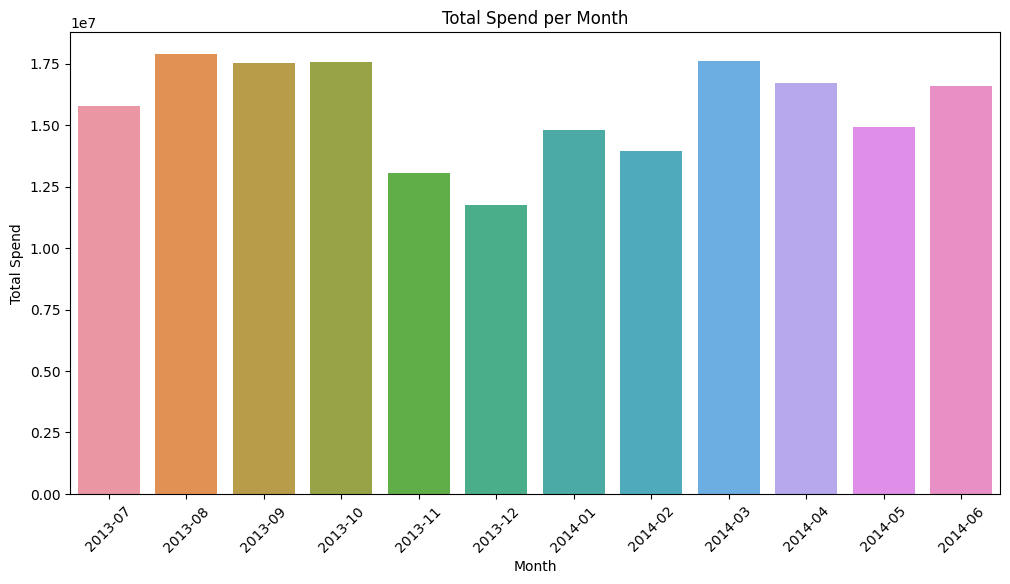

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_spend.index, y=monthly_spend.values)
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.title('Total Spend per Month')
plt.xticks(rotation=45)
plt.show()

In [ ]:
monthly_spend.to_excel("monthly_spend.xlsx",index=True)